# Vehicle Insurance Prediction

Deployment of the ML model

In [6]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
v_insurance=pd.read_csv(r'D:\MY ALL  practice end to end projects\WBG_Financial_project\Notebook\Dataset\train_insurance.csv')
v_insurance.head(5)

ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0  816393  40-64  female             20-29y   university   middle class   
1  251762  26-39    male             20-29y  high school   middle class   
2  481952  40-64    male             20-29y         none   middle class   
3    3506  40-64    male             20-29y  high school    upper class   
4  498013  40-64  female             20-29y         none  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0      0.638050                  0   after 2015        0         0   
1      0.475741                  1  before 2015        1         0   
2      0.839817                  1  before 2015        1         1   
3      0.682527                  1  before 2015        0         1   
4      0.572184                  1   after 2015        1         1   

   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0        37379           11000                    0     0               0   
1        10238            9000                    0     0               0   
2        10238           12000                    0     0               0   
3        92099            6000                    1     0               0   
4        32122           15000                    0     0               1   

   OUTCOME TYPE_OF_VEHICLE  
0        0      Sports Car  
1        1       HatchBack  
2        1           Sedan  
3        1           Sedan  
4        0           Sedan

In [8]:
v_insurance.shape

(87285, 18)

In [9]:
v_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87285 entries, 0 to 87284
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87285 non-null  int64  
 1   AGE                  87285 non-null  object 
 2   GENDER               87285 non-null  object 
 3   DRIVING_EXPERIENCE   87285 non-null  object 
 4   EDUCATION            87285 non-null  object 
 5   INCOME               87285 non-null  object 
 6   CREDIT_SCORE         87285 non-null  float64
 7   VEHICLE_OWNERSHIP    87285 non-null  int64  
 8   VEHICLE_YEAR         87285 non-null  object 
 9   MARRIED              87285 non-null  int64  
 10  CHILDREN             87285 non-null  int64  
 11  POSTAL_CODE          87285 non-null  int64  
 12  ANNUAL_MILEAGE       87285 non-null  int64  
 13  SPEEDING_VIOLATIONS  87285 non-null  int64  
 14  DUIS                 87285 non-null  int64  
 15  PAST_ACCIDENTS       87285 non-null 

In [10]:
# I conclude that the dataset have no null value are present

In [11]:
# we can check the 5 points summary
v_insurance.describe(include=np.number)

ID  CREDIT_SCORE  VEHICLE_OWNERSHIP       MARRIED  \
count   87285.000000  87285.000000       87285.000000  87285.000000   
mean   394798.841554      0.602053           0.827760      0.584969   
std    279746.732730      0.137898           0.377591      0.492730   
min       101.000000      0.074401           0.000000      0.000000   
25%    156345.000000      0.514841           1.000000      0.000000   
50%    353756.000000      0.600938           1.000000      1.000000   
75%    598618.000000      0.703000           1.000000      1.000000   
max    999976.000000      0.954075           1.000000      1.000000   

           CHILDREN   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  \
count  87285.000000  87285.000000    87285.000000         87285.000000   
mean       0.519746  18036.278192    11056.424357             0.679395   
std        0.499613  16724.517018     2977.057974             1.388733   
min        0.000000  10238.000000     2000.000000             0.000000   
25%        0.000000  10238.000000     9000.000000             0.000000   
50%        1.000000  10238.000000    11000.000000             0.000000   
75%        1.000000  22320.000000    13000.000000             1.000000   
max        1.000000  92101.000000    21000.000000            20.000000   

               DUIS  PAST_ACCIDENTS       OUTCOME  
count  87285.000000    87285.000000  87285.000000  
mean       0.129633        0.546417      0.422959  
std        0.589598        1.397537      0.494032  
min        0.000000        0.000000      0.000000  
25%        0.000000        0.000000      0.000000  
50%        0.000000        0.000000      0.000000  
75%        0.000000        0.000000      1.000000  
max        6.000000       15.000000      1.000000

In [12]:
# we can say that the most of variable have 50% quantile (min) are 0.00.  

In [13]:
v_insurance.describe(include=object)

AGE GENDER DRIVING_EXPERIENCE    EDUCATION       INCOME  \
count   87285  87285              87285        87285        87285   
unique      4      2                  4            3            4   
top     40-64   male             20-29y  high school  upper class   
freq    27967  54379              31171        38746        42685   

       VEHICLE_YEAR TYPE_OF_VEHICLE  
count         87285           87285  
unique            2               4  
top     before 2015      Sports Car  
freq          47738           28723

In [14]:
#In the dataset have categorical variable are present and we want cleaning the dataset before moving ahead.

In [15]:
v_insurance.groupby('AGE')['DRIVING_EXPERIENCE'].agg(pd.Series.mode).to_frame()

DRIVING_EXPERIENCE
AGE                     
16-25             20-29y
26-39             20-29y
40-64             20-29y
65+               20-29y

In [16]:
v_insurance.AGE.value_counts()

AGE
40-64    27967
65+      27398
26-39    16677
16-25    15243
Name: count, dtype: int64

In [17]:
CC_A=v_insurance['AGE']


In [18]:
# Function to convert age to age group
def age_to_group(AGE):
    if AGE== '40-64':
        return 2
    elif AGE== '65+':
        return 1
    elif AGE== '26-39':
        return 3
    elif AGE== '16-25':
        return 0
    else:
        return 'Other'
v_insurance['AGE']=v_insurance['AGE'].apply(age_to_group)
   


In [19]:
def age_to_group(DRIVING_EXPERIENCE):
    if DRIVING_EXPERIENCE== '20-29y':
        return 2
    elif DRIVING_EXPERIENCE== '0-9y':
        return 0
    elif DRIVING_EXPERIENCE== '10-19y':
        return 3
    elif DRIVING_EXPERIENCE== '30y+':
        return 1
    else:
        return 'Other'
v_insurance['DRIVING_EXPERIENCE'] = v_insurance['DRIVING_EXPERIENCE'].apply(age_to_group)

In [20]:
cols=['ID', 'AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'TYPE_OF_VEHICLE']


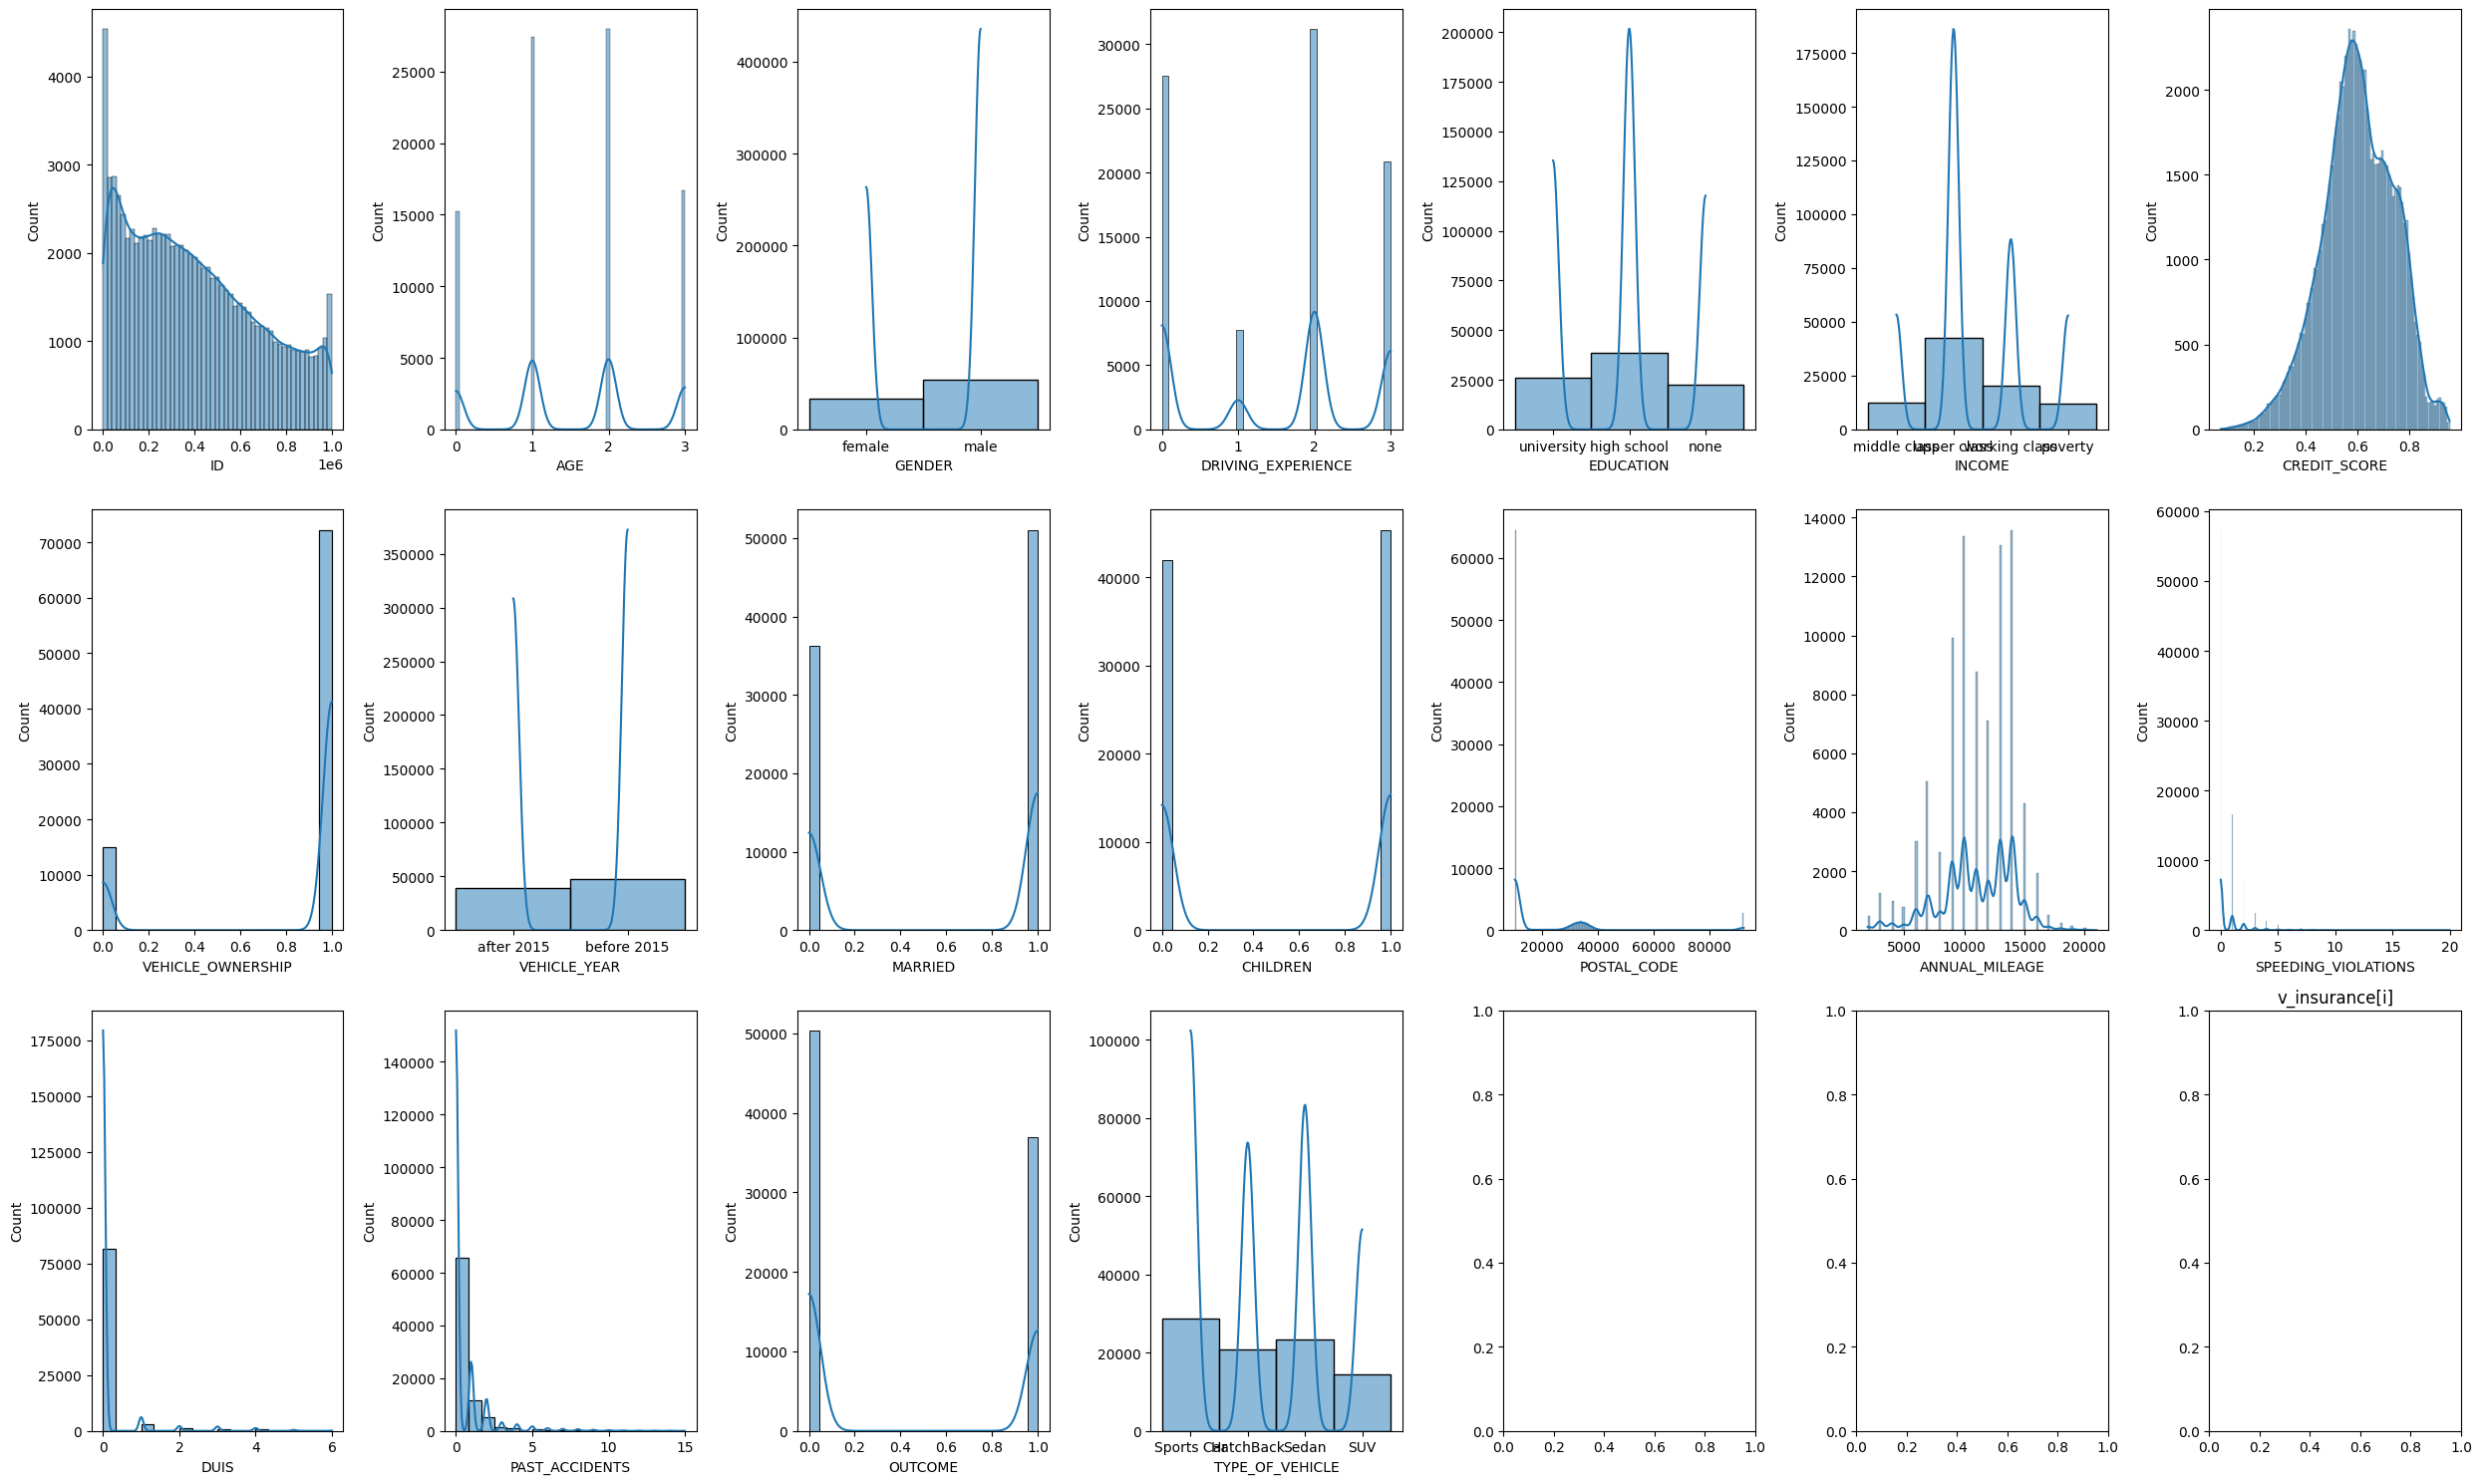

In [21]:
fig,ax=plt.subplots(3,7,figsize=(25,15))
for i ,j in zip(cols,ax.flatten()):
    sns.histplot(v_insurance[i],ax=j,kde=True)
    plt.title('v_insurance[i]')
plt.tight_layout()
plt.show()

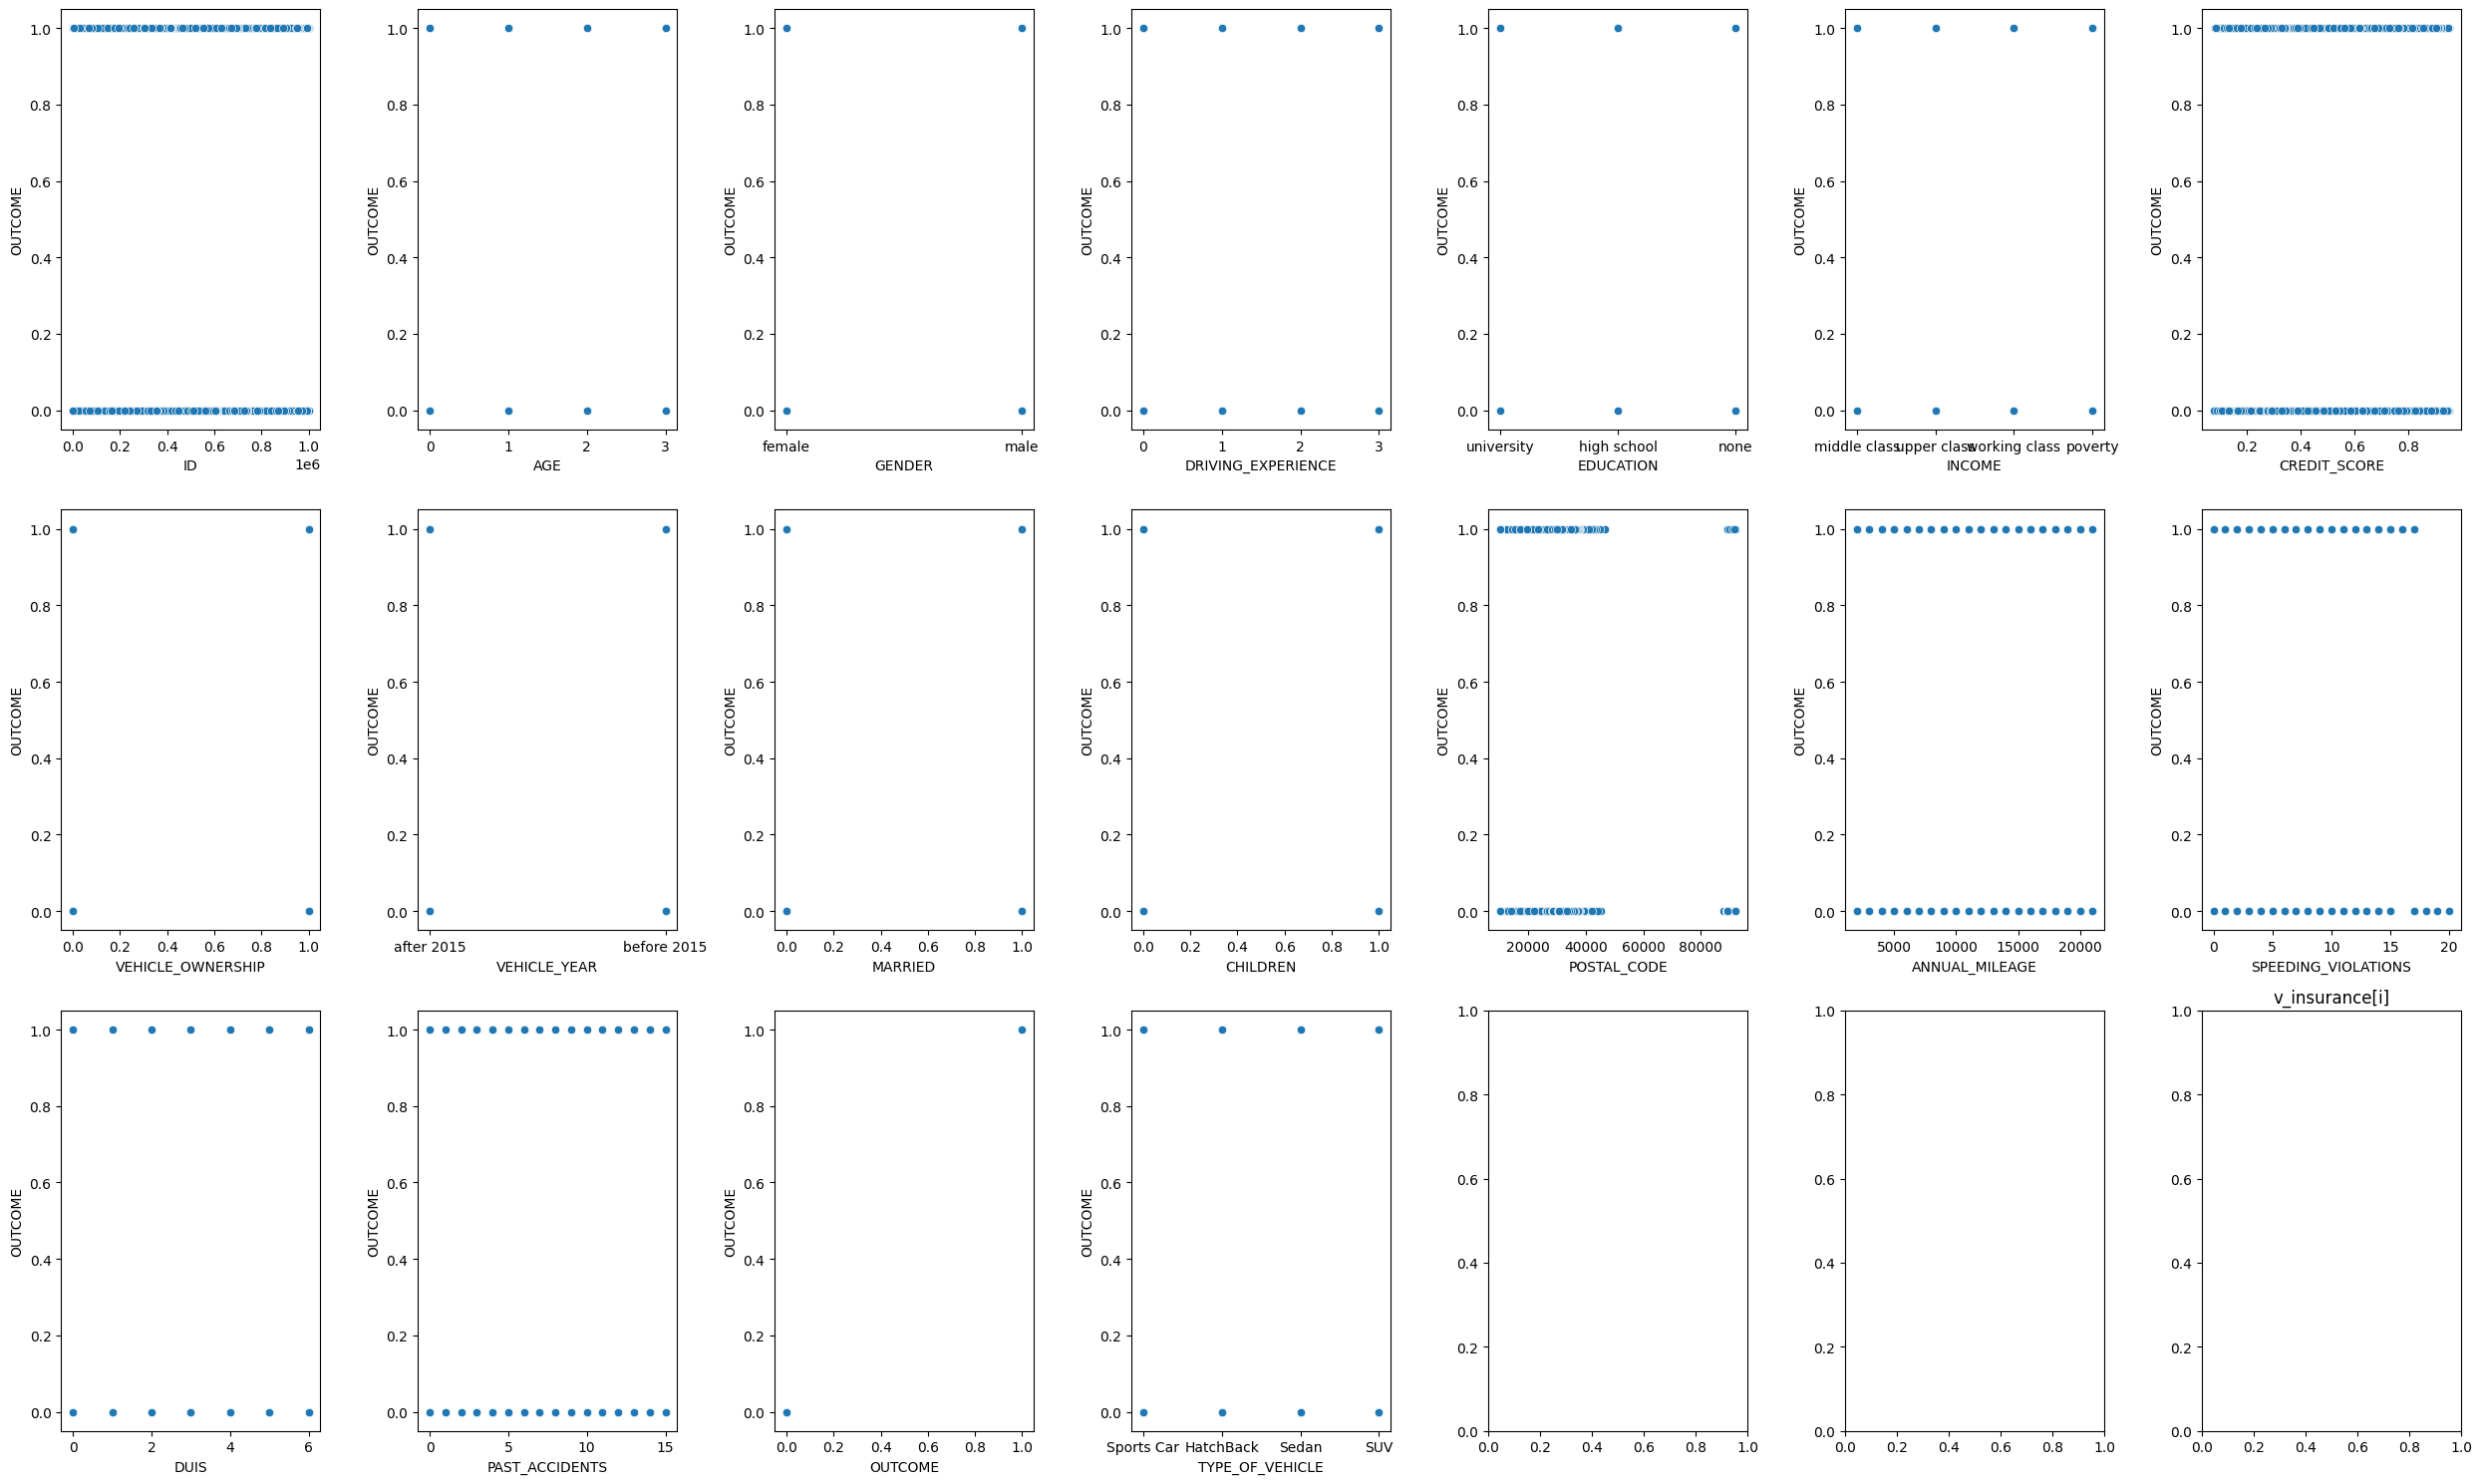

In [22]:
fig,ax=plt.subplots(3,7,figsize=(25,15))
for i ,j in zip(cols,ax.flatten()):
    sns.scatterplot(x=v_insurance[i],y=v_insurance['OUTCOME'],ax=j)
    plt.title('v_insurance[i]')
plt.tight_layout()
plt.show()

<Figure size 2500x1500 with 0 Axes>

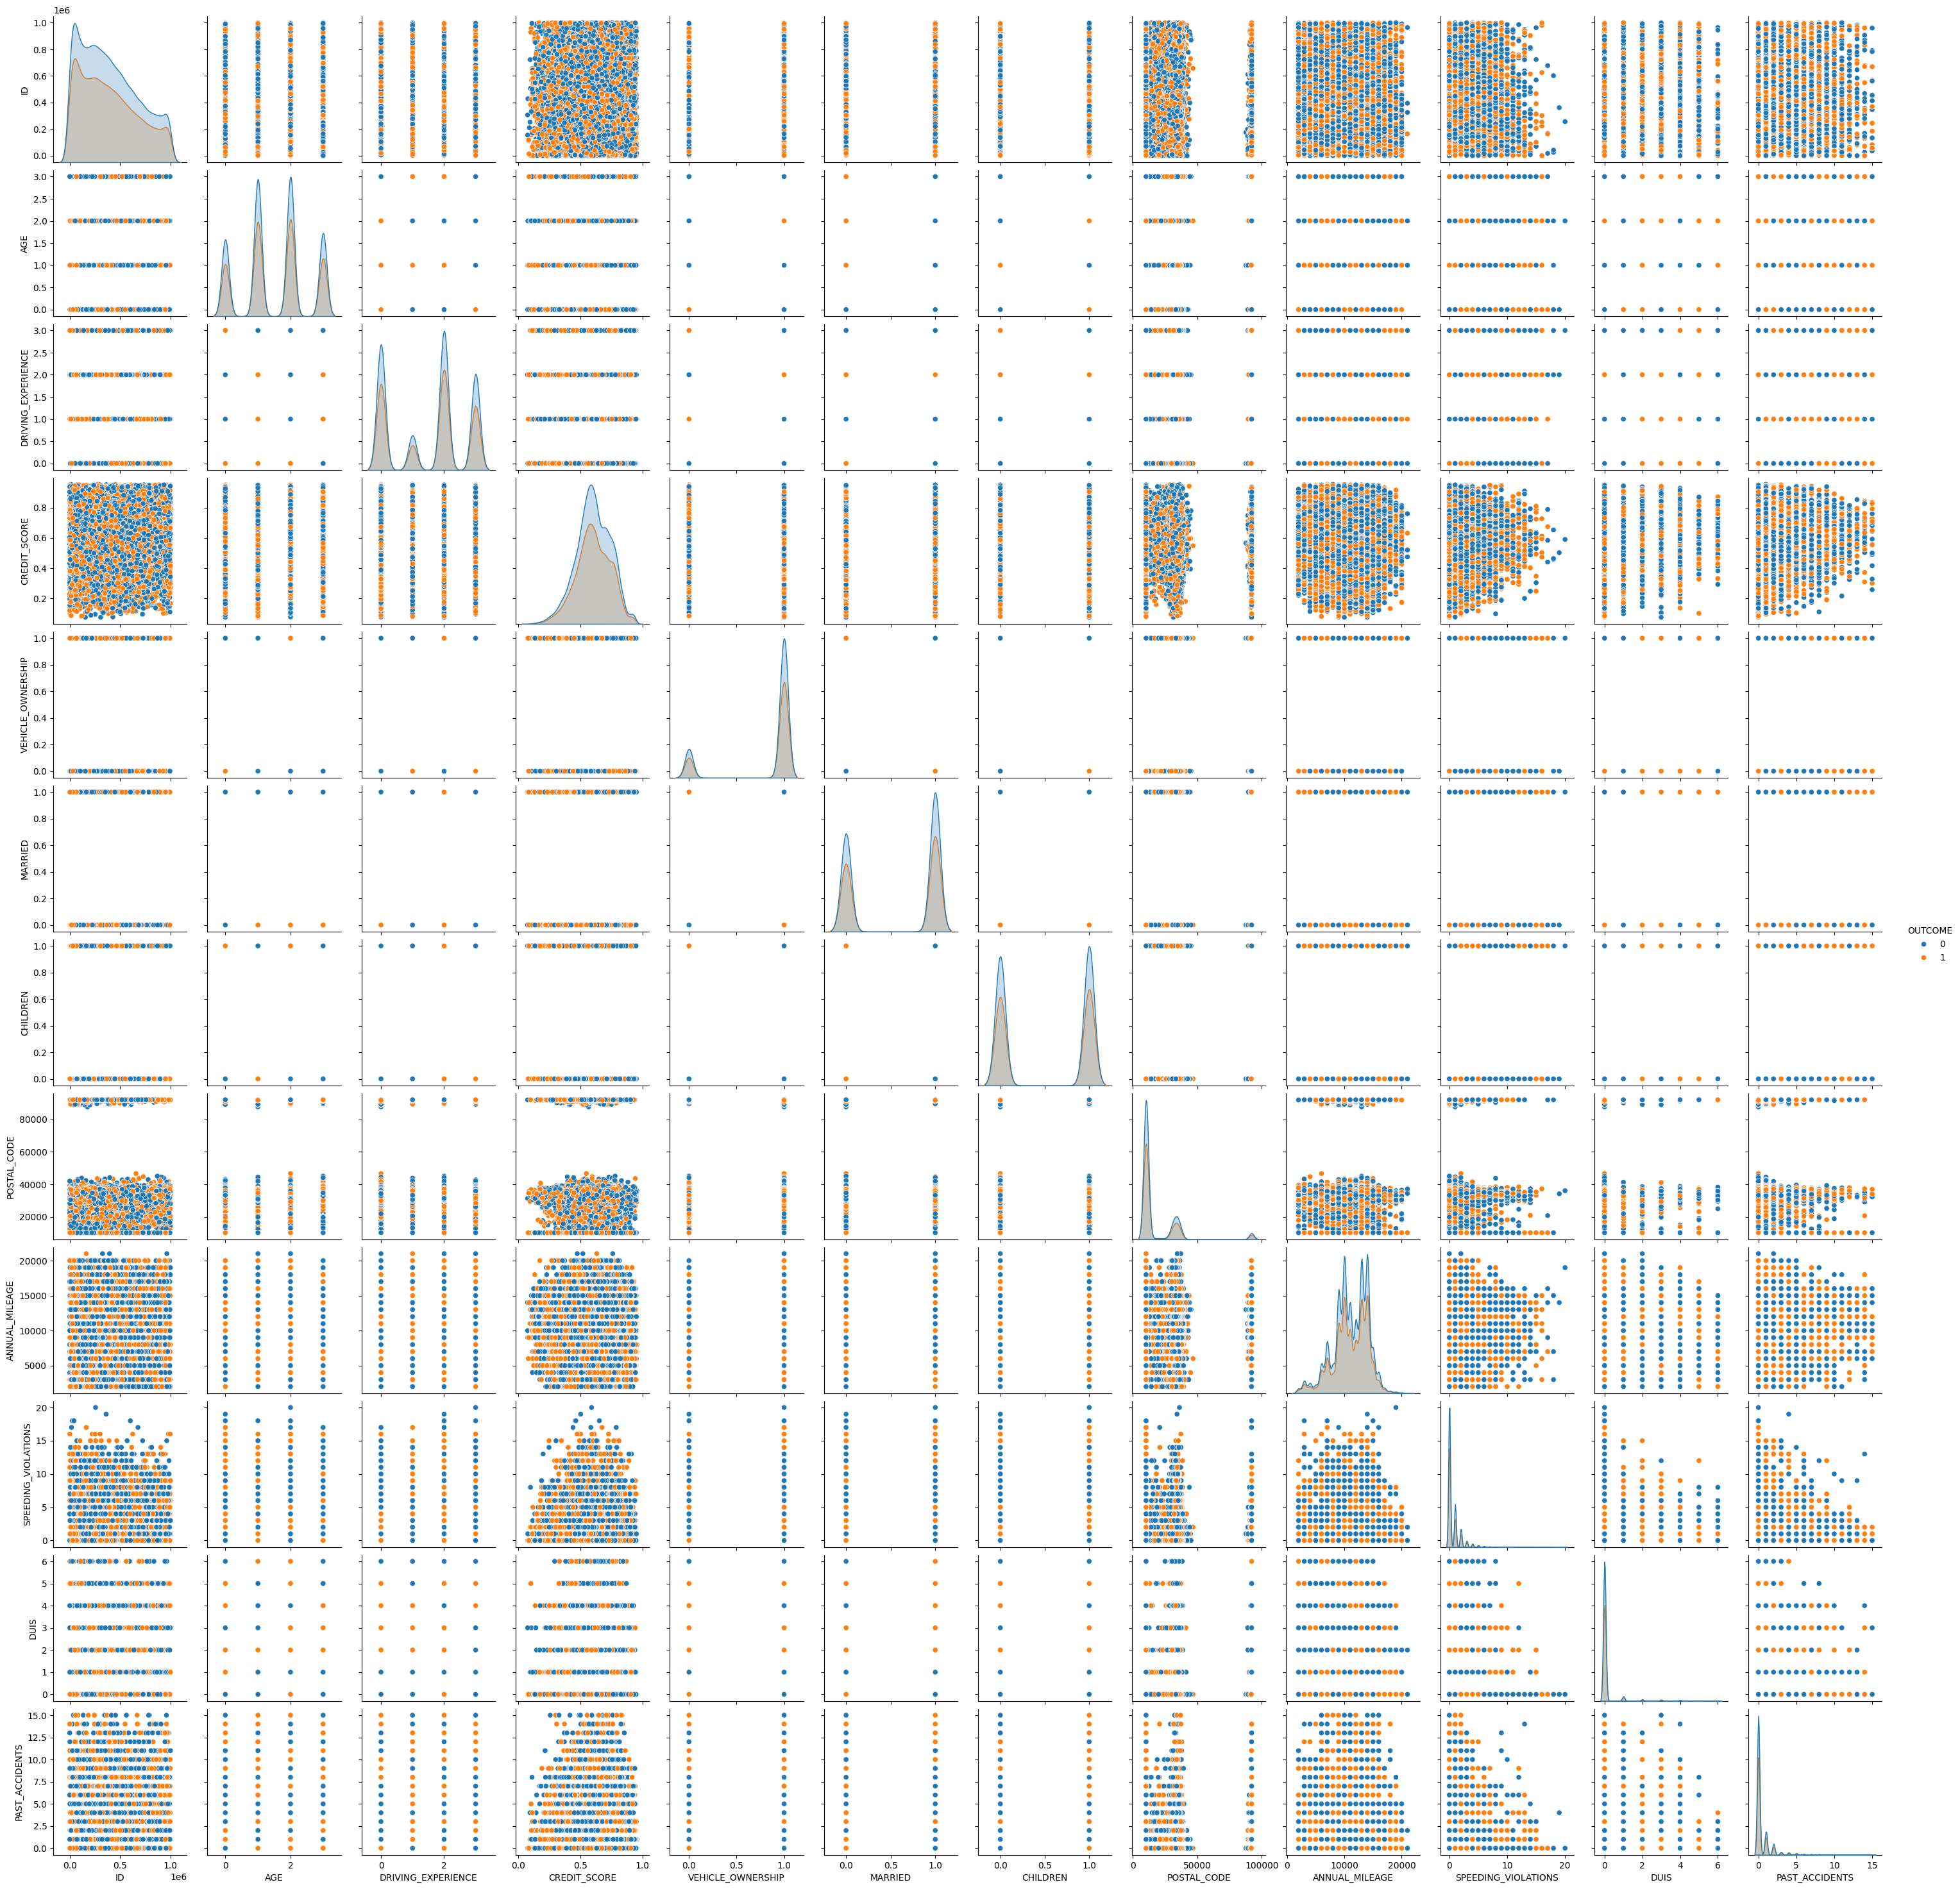

In [23]:
plt.figure(figsize=(25,15))
sns.pairplot(v_insurance,hue='OUTCOME')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()
v_insurance['VEHICLE_YEAR']=ll.fit_transform(v_insurance['VEHICLE_YEAR'])
dc_t={'upper class':1,'working class' :3,'middle class':2,'poverty':0}
v_insurance['INCOME']=v_insurance['INCOME'].map(dc_t)
v_insurance['EDUCATION']=v_insurance['EDUCATION'].map({'high school':2,'university':1,'none':0})
v_insurance['GENDER']=v_insurance['GENDER'].map({'female':0,'male':1})
v_insurance['TYPE_OF_VEHICLE']=ll.fit_transform(v_insurance['TYPE_OF_VEHICLE'])

In [25]:
v_insurance.head(5)

ID  AGE  GENDER  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0  816393    2       0                   2          1       2      0.638050   
1  251762    3       1                   2          2       2      0.475741   
2  481952    2       1                   2          0       2      0.839817   
3    3506    2       1                   2          2       1      0.682527   
4  498013    2       0                   2          0       3      0.572184   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  POSTAL_CODE  \
0                  0             0        0         0        37379   
1                  1             1        1         0        10238   
2                  1             1        1         1        10238   
3                  1             1        0         1        92099   
4                  1             0        1         1        32122   

   ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  OUTCOME  \
0           11000                    0     0               0        0   
1            9000                    0     0               0        1   
2           12000                    0     0               0        1   
3            6000                    1     0               0        1   
4           15000                    0     0               1        0   

   TYPE_OF_VEHICLE  
0                3  
1                0  
2                2  
3                2  
4                2

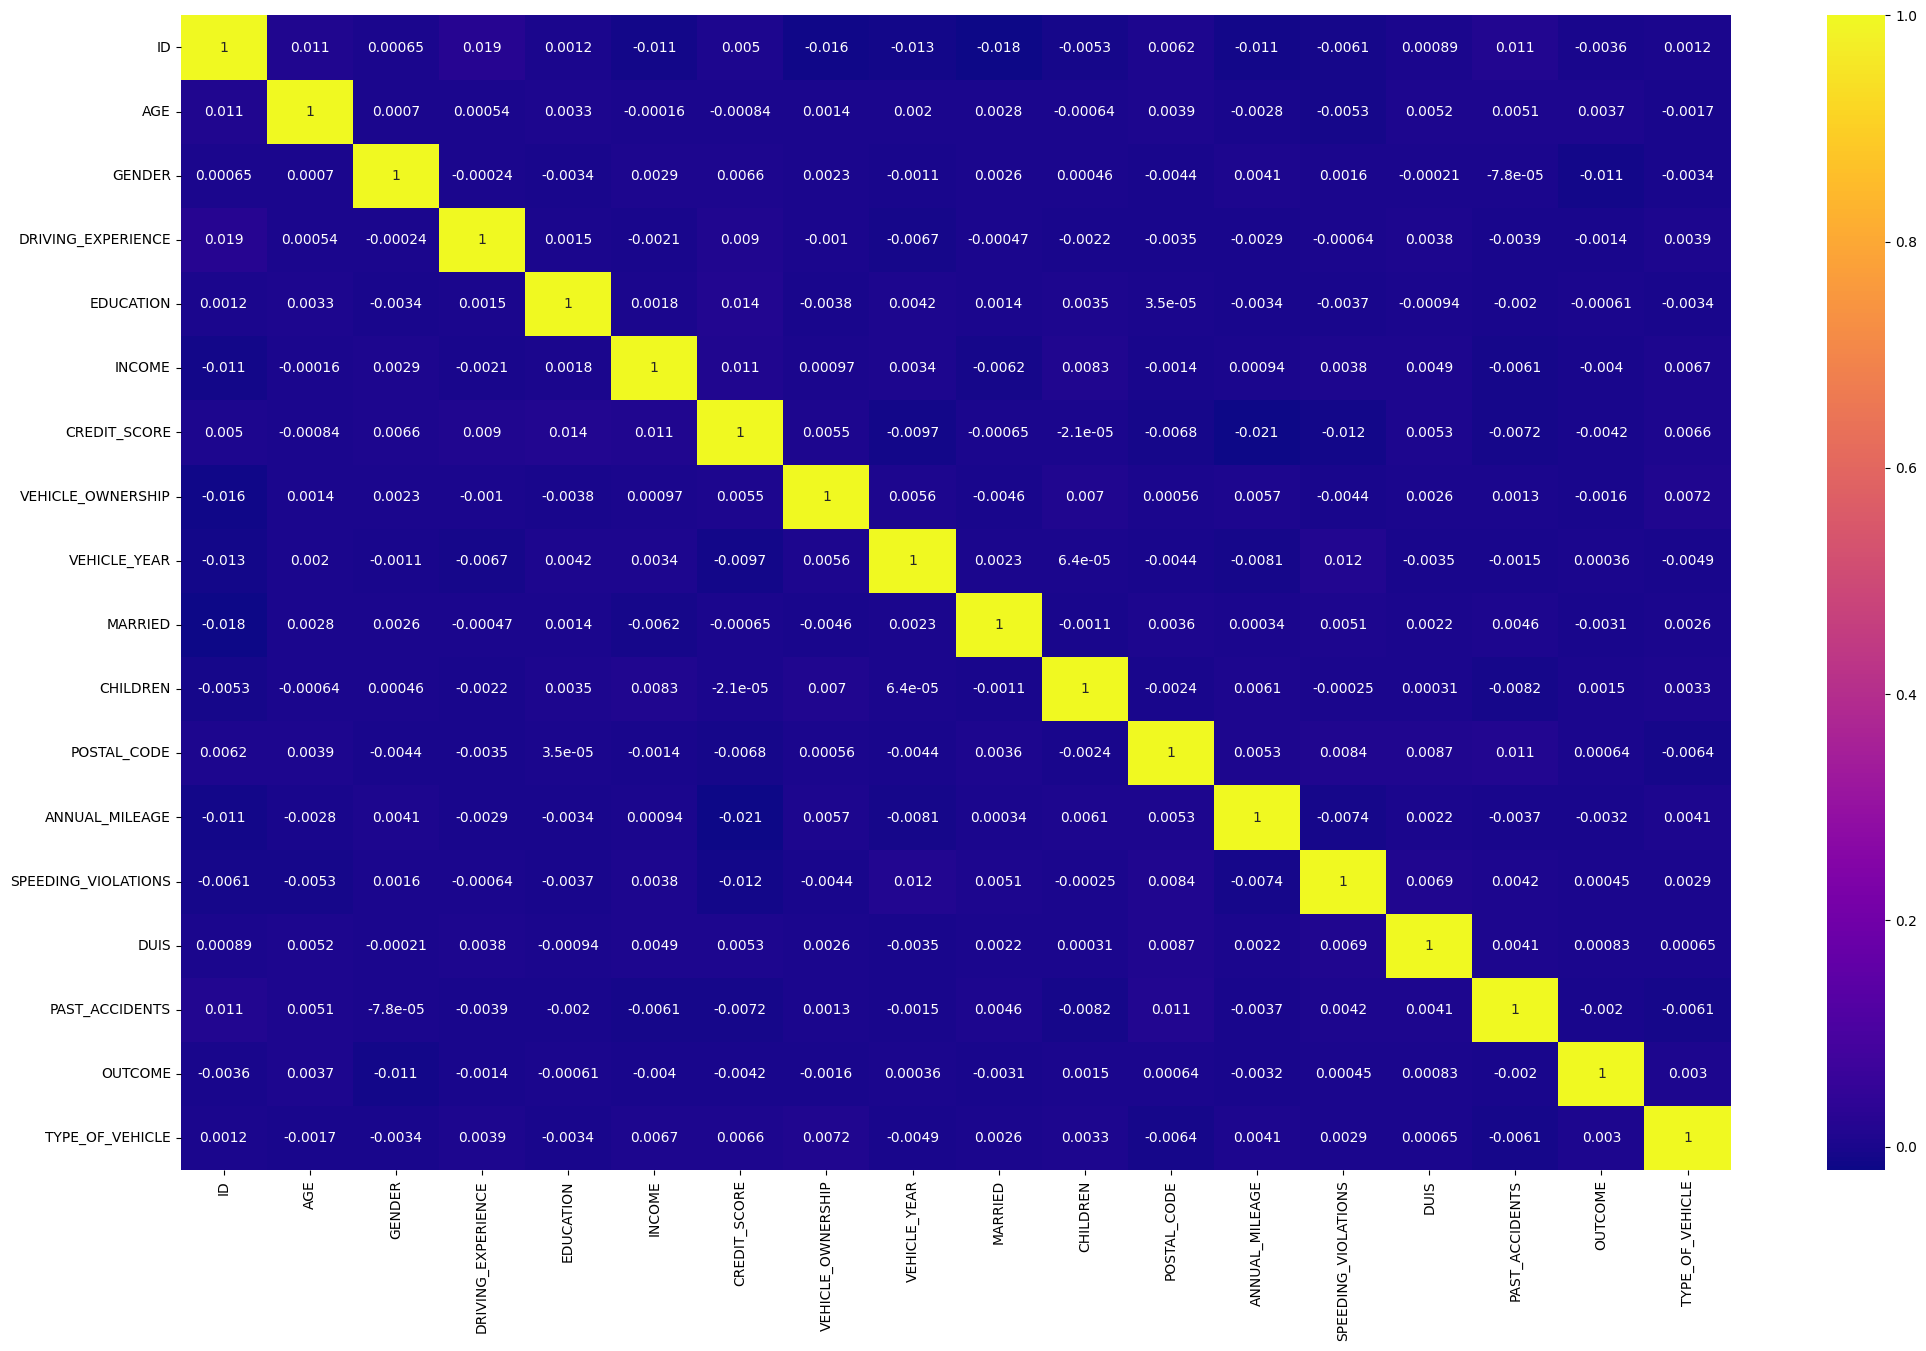

In [26]:
#check relation between dependent and independent variable
plt.figure(figsize=(25,15))
sns.heatmap(v_insurance.corr(),annot=True,cmap="plasma")
plt.show()

In [27]:
#all veriables are correlated with dependent variable and no multi-collinearity preasent

In [28]:
#check outliers are present or not in the data

In [29]:
v_insurance.shape

(87285, 18)

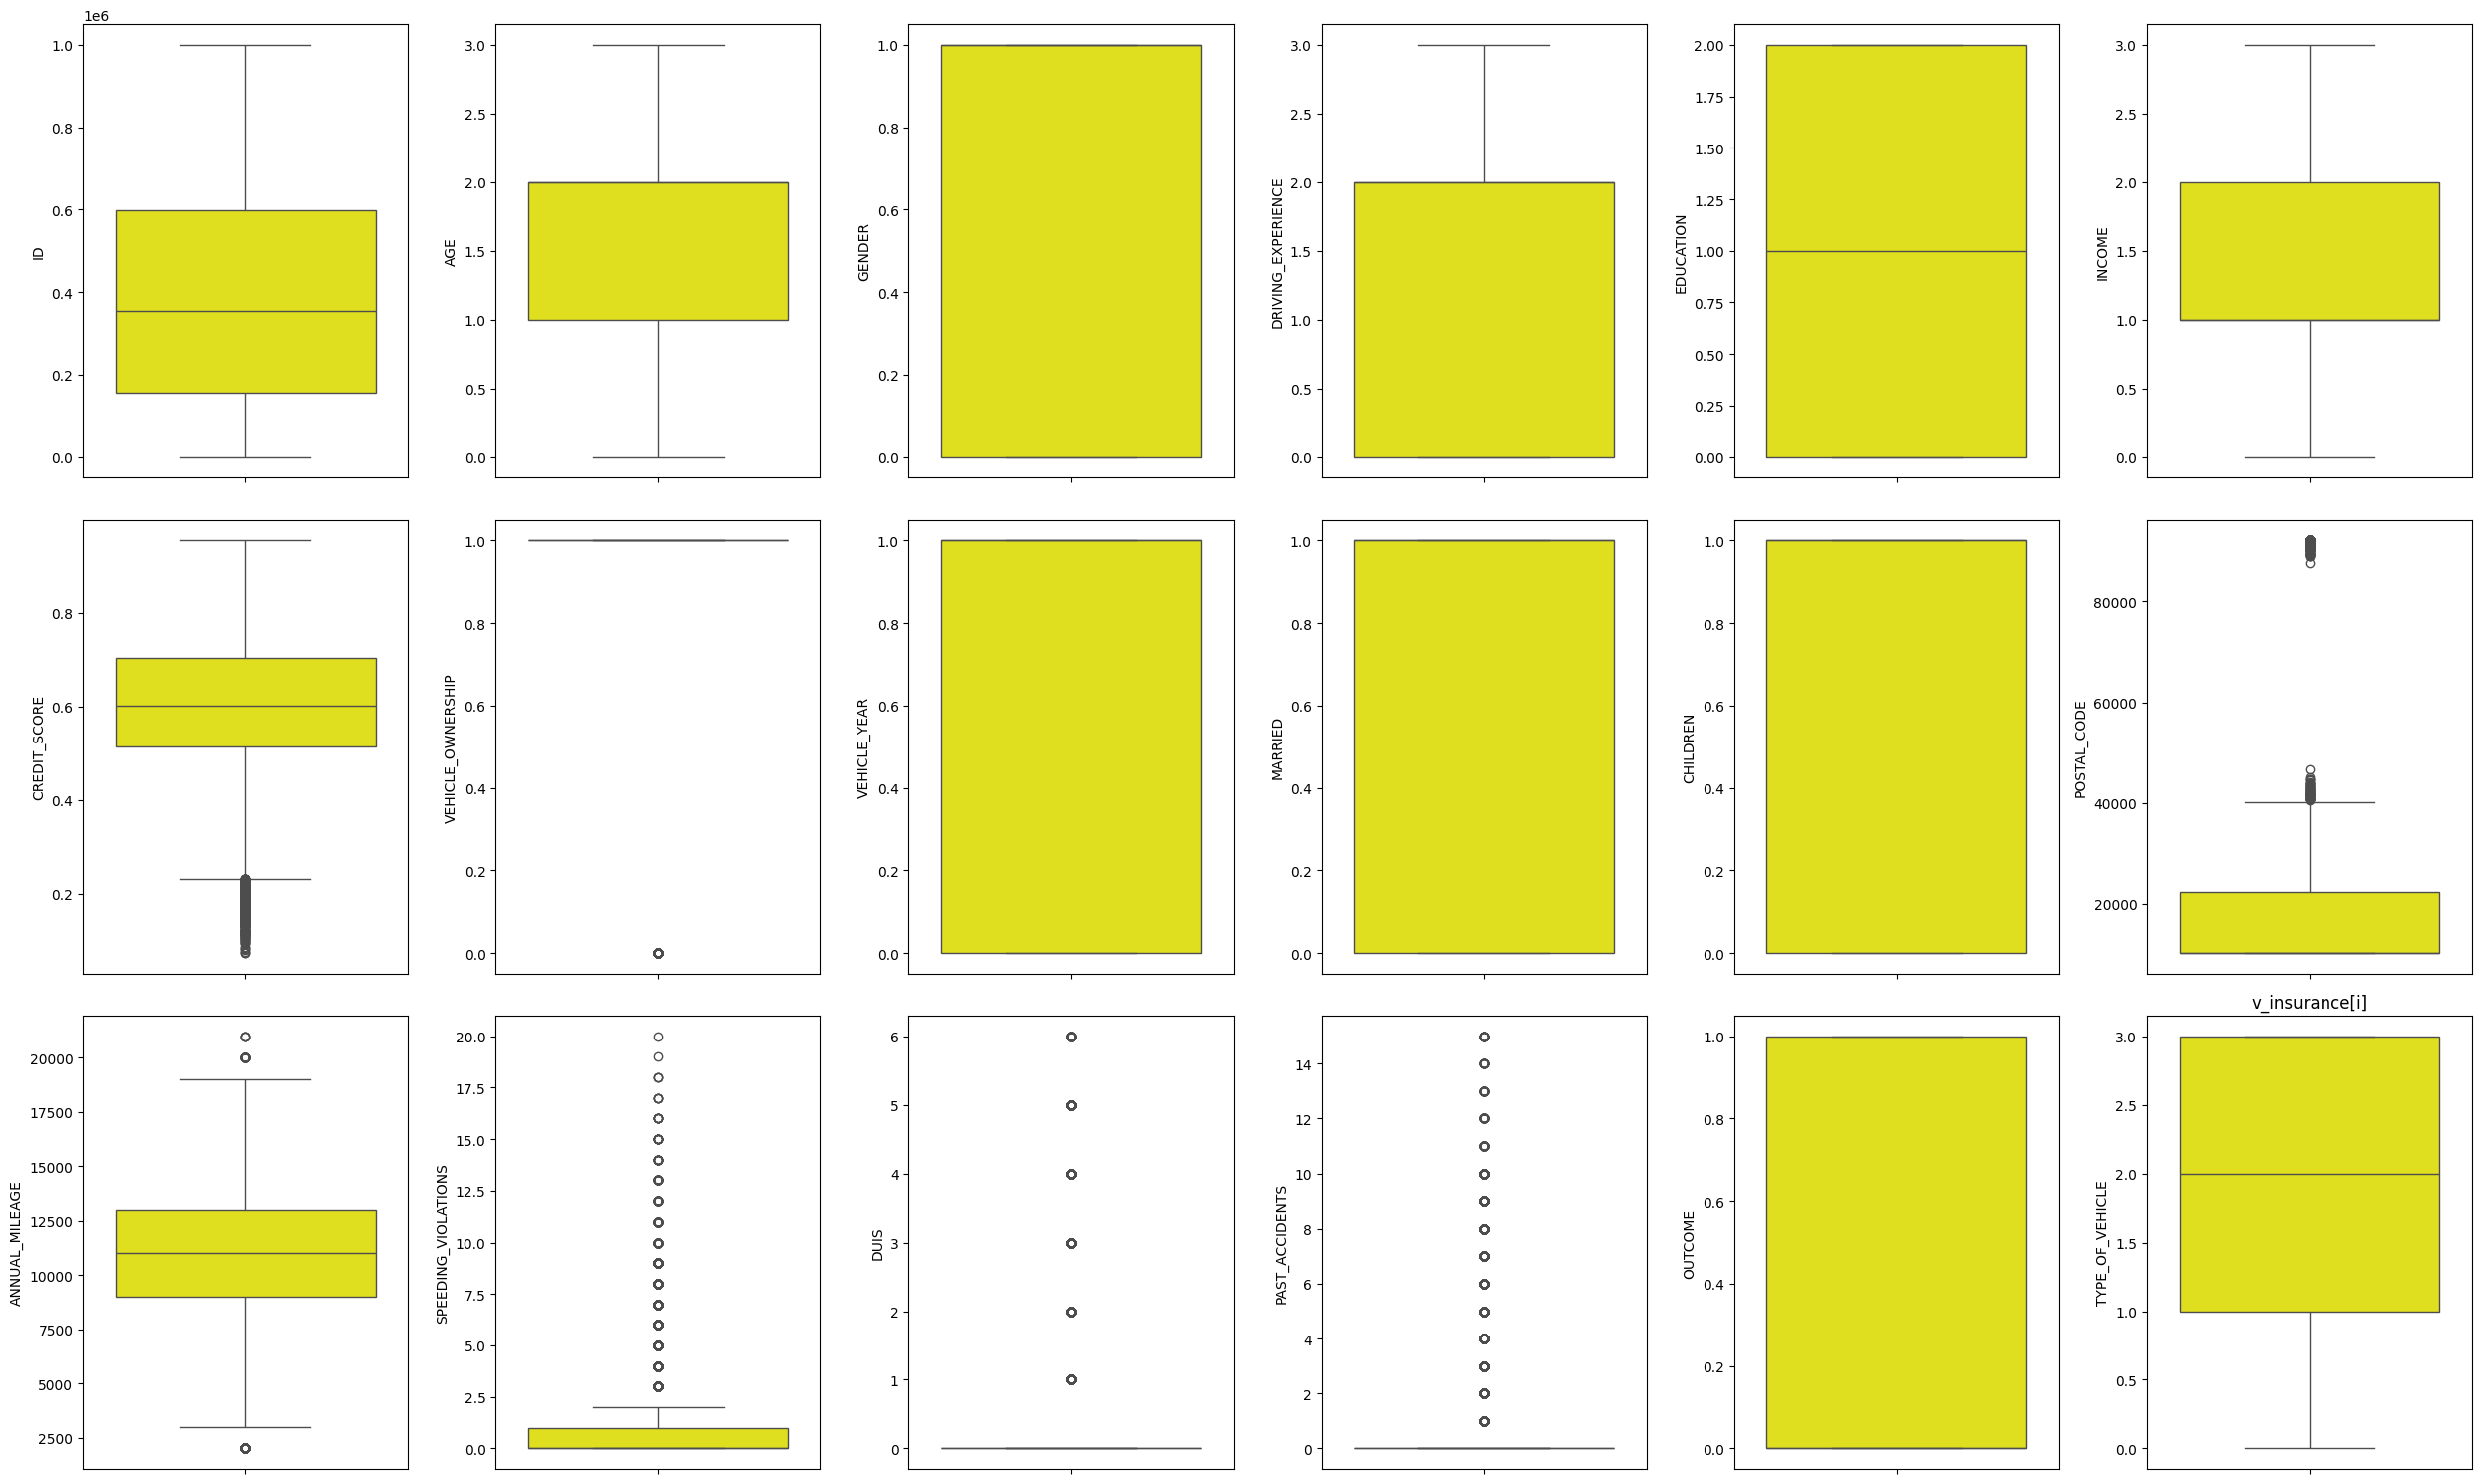

In [30]:
fig, ax= plt.subplots(3,6, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(v_insurance[i],ax=subplot,color='yellow')
    plt.title('v_insurance[i]')

plt.tight_layout()
plt.show()

In [31]:
#CREDIT_SCORE,VEHICLE_OWNERSHIP,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS they are presence of outliers but we can treat them and take copy of the original dataset 

In [32]:
v_insurance1=v_insurance.copy()

In [33]:
import numpy as np

q1 = v_insurance.quantile(0.25)
q3 = v_insurance.quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

# Use np.clip to apply the correction
v_insurance = np.clip(v_insurance, lower_limit, upper_limit,axis=1)


In [34]:
v_insurance.head(5)

ID  AGE  GENDER  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0  816393    2       0                   2          1       2      0.638050   
1  251762    3       1                   2          2       2      0.475741   
2  481952    2       1                   2          0       2      0.839817   
3    3506    2       1                   2          2       1      0.682527   
4  498013    2       0                   2          0       3      0.572184   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  POSTAL_CODE  \
0                  1             0        0         0        37379   
1                  1             1        1         0        10238   
2                  1             1        1         1        10238   
3                  1             1        0         1        40443   
4                  1             0        1         1        32122   

   ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  OUTCOME  \
0           11000                  0.0     0               0        0   
1            9000                  0.0     0               0        1   
2           12000                  0.0     0               0        1   
3            6000                  1.0     0               0        1   
4           15000                  0.0     0               0        0   

   TYPE_OF_VEHICLE  
0                3  
1                0  
2                2  
3                2  
4                2

In [35]:
v_insurance1.head(5)

ID  AGE  GENDER  DRIVING_EXPERIENCE  EDUCATION  INCOME  CREDIT_SCORE  \
0  816393    2       0                   2          1       2      0.638050   
1  251762    3       1                   2          2       2      0.475741   
2  481952    2       1                   2          0       2      0.839817   
3    3506    2       1                   2          2       1      0.682527   
4  498013    2       0                   2          0       3      0.572184   

   VEHICLE_OWNERSHIP  VEHICLE_YEAR  MARRIED  CHILDREN  POSTAL_CODE  \
0                  0             0        0         0        37379   
1                  1             1        1         0        10238   
2                  1             1        1         1        10238   
3                  1             1        0         1        92099   
4                  1             0        1         1        32122   

   ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  OUTCOME  \
0           11000                    0     0               0        0   
1            9000                    0     0               0        1   
2           12000                    0     0               0        1   
3            6000                    1     0               0        1   
4           15000                    0     0               1        0   

   TYPE_OF_VEHICLE  
0                3  
1                0  
2                2  
3                2  
4                2

In [36]:
#split the data
from sklearn.preprocessing import StandardScaler
x=v_insurance1.drop('OUTCOME',axis=1)
y=v_insurance1['OUTCOME']
ss=StandardScaler()
X=ss.fit_transform(x)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.90,random_state=1)

In [38]:
#statistically check the dataset 
import scipy.stats as stats
stat,p_value=stats.ttest_ind(X_train,y_train)
print(stat)
print('****************************************')
print(p_value)

[-106.26891058 -106.82092542 -105.77629648 -106.3026633  -106.08150975
 -105.96024808 -106.19281359 -106.03560111 -106.39139526 -106.76060444
 -106.13003433 -106.04589343 -106.34731411 -106.88801642 -106.07032769
 -106.55347032 -106.6296254 ]
****************************************
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
# the all dataset or all variable are follow normal distrubution and its lie on level of significance.

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn import metrics

In [41]:
def roc_auc_c(model,X_train,X_test,y_train,y_test):
    y_pred_prob=model.predict_proba(X_train)
    fpr,tpr,thresholds=roc_curve(y_train,y_pred_prob[:,1])
    plt.plot(fpr,tpr)
    #set limit for x y axis
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    #plot the streangth line showing worst prediction for the model
    plt.plot([0,1],[0,1],'r--')
    plt.title('ROC curve for Admission Prediction classifier(full model)',fontsize=15)
    plt.xlabel('tpr',fontsize=15)
    plt.ylabel('fpr',fontsize=15)
    auc=round(metrics.roc_auc_score(y_train,y_pred_prob[:,1]),4)
    plt.text(x=0.6,y=0.4,s=('AUC Score',auc))
    plt.grid(True)
    plt.show()

    

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model1=knn.fit(X_train,y_train)


In [43]:
pred_xtr=model1.predict(X_train)
print(classification_report(y_train,pred_xtr))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     45349
           1       0.67      0.56      0.61     33207

    accuracy                           0.70     78556
   macro avg       0.69      0.68      0.68     78556
weighted avg       0.69      0.70      0.69     78556



In [44]:
pred_xt=model1.predict(X_test)
print(classification_report(y_test,pred_xt))

              precision    recall  f1-score   support

           0       0.57      0.64      0.61      5018
           1       0.42      0.36      0.39      3711

    accuracy                           0.52      8729
   macro avg       0.50      0.50      0.50      8729
weighted avg       0.51      0.52      0.51      8729



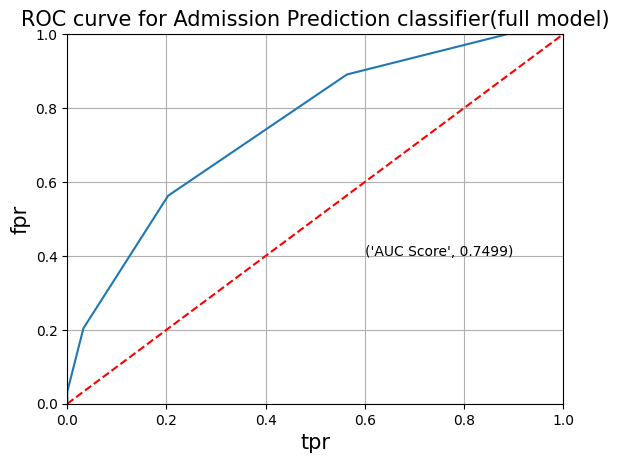

None


In [45]:
print(roc_auc_c(model1,X_train,X_test,y_train,y_test))

In [46]:
# The above base model doing well in training enviroment 
# i have get 70% accuray and f1_score are 0:75 and 1:61 also get better auc score 0.74.

In [47]:
# but we can used more base models
from sklearn.naive_bayes import GaussianNB

In [48]:
NB=GaussianNB()
model2=NB.fit(X_train,y_train)
pred_xtr1=model2.predict(X_train)
print(classification_report(y_train,pred_xtr1))

              precision    recall  f1-score   support

           0       0.58      0.98      0.73     45349
           1       0.44      0.03      0.05     33207

    accuracy                           0.57     78556
   macro avg       0.51      0.50      0.39     78556
weighted avg       0.52      0.57      0.44     78556



In [49]:
# we can see the above base moidel not work its decreases its accuracy in training enviroment.

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
model3=dt.fit(X_train,y_train)
pred_xtr2=model3.predict(X_train)
print(classification_report(y_train,pred_xtr2))
print(" ")
print(confusion_matrix(y_train,pred_xtr2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45349
           1       1.00      1.00      1.00     33207

    accuracy                           1.00     78556
   macro avg       1.00      1.00      1.00     78556
weighted avg       1.00      1.00      1.00     78556

 
[[45349     0]
 [    0 33207]]


In [51]:
# The decission Tree algorithm always follow its disadvantage the model goes on overfitting not training well but replecated on testing enviroment.


In [52]:
# we can used bagging algo.
from sklearn.ensemble import RandomForestClassifier
rf_clss=RandomForestClassifier(n_estimators=1,max_depth=5,random_state=109)
model4=rf_clss.fit(X_train,y_train)
pred_xtr3=model4.predict(X_train)

print(classification_report(y_train,pred_xtr3))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73     45349
           1       0.52      0.01      0.02     33207

    accuracy                           0.58     78556
   macro avg       0.55      0.50      0.37     78556
weighted avg       0.55      0.58      0.43     78556



In [53]:
print(confusion_matrix(y_train,pred_xtr3))

[[45096   253]
 [32930   277]]


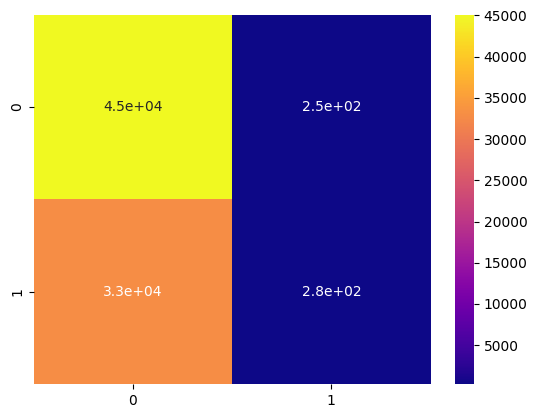

In [54]:
cm=confusion_matrix(y_train,pred_xtr3)
sns.heatmap(cm,annot=True,cmap='plasma')
plt.show()

In [55]:
#used gridsearchCV
from sklearn.model_selection import GridSearchCV
tuning=[{'criterion':['entropy','gini'],
                    'n_estimators':[2,3,4,5,6,8,9],

                    'max_depth': [5,10,15],
                    'min_samples_split':[2,5,8]}]

In [56]:
random_forest_class=RandomForestClassifier(random_state=1)
rf_grid=GridSearchCV(estimator=random_forest_class,param_grid=tuning,cv=5)
model_rf=rf_grid.fit(X_train,y_train)
print('Best parameters fro RF:-',model_rf.best_params_)

Best parameters fro RF:- {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 9}


In [57]:
rf_model=RandomForestClassifier(**model_rf.best_params_,random_state=1)
rf_model=rf_model.fit(X_train,y_train)

In [58]:
y_pred_test_RF1=rf_model.predict(X_test)
print(classification_report(y_test,y_pred_test_RF1))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73      5018
           1       0.80      0.00      0.00      3711

    accuracy                           0.58      8729
   macro avg       0.69      0.50      0.37      8729
weighted avg       0.67      0.58      0.42      8729



In [59]:
re_model1=RandomForestClassifier(n_estimators=1,max_depth=5,random_state=110)
model6=re_model1.fit(X_train,y_train)
pred_xtr6=model6.predict(X_train)
print(classification_report(y_train,pred_xtr6))

              precision    recall  f1-score   support

           0       0.58      0.99      0.73     45349
           1       0.51      0.01      0.02     33207

    accuracy                           0.58     78556
   macro avg       0.54      0.50      0.38     78556
weighted avg       0.55      0.58      0.43     78556



In [60]:
import xgboost

In [61]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=6,learning_rate=0.01)
model5=xgb.fit(X_train,y_train)
pred_xtr4=model5.predict(X_train)
print(classification_report(y_train,pred_xtr4))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73     45349
           1       0.00      0.00      0.00     33207

    accuracy                           0.58     78556
   macro avg       0.29      0.50      0.37     78556
weighted avg       0.33      0.58      0.42     78556



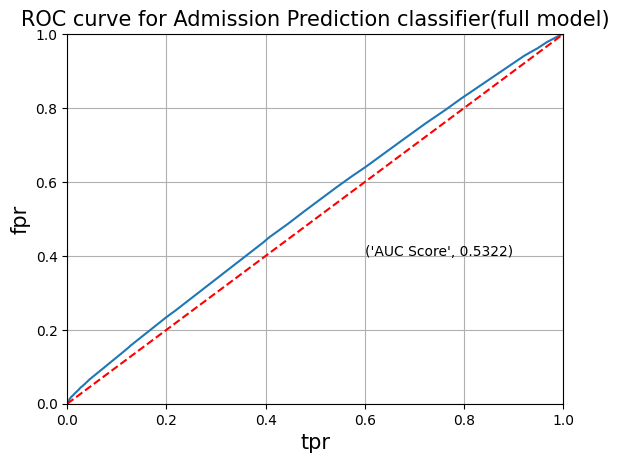

None


In [62]:
print(roc_auc_c(model5,X_train,X_test,y_train,y_test))

In [63]:
# we can conclude that the  base model is best model because of overall performance are good .

In [64]:
test_vi=pd.read_csv(r'D:\MY ALL  practice end to end projects\WBG_Financial_project\Notebook\Dataset\test_insurance.csv')
test_vi.head(5)

ID    AGE  GENDER DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0  303713  16-25    male             10-19y  high school   middle class   
1  141107  16-25    male             20-29y  high school  working class   
2  447316  26-39  female             20-29y  high school    upper class   
3  196066  16-25  female             20-29y   university   middle class   
4  179947  16-25    male             20-29y  high school  working class   

   CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0      0.424958                  1  before 2015        1         0   
1      0.503478                  0  before 2015        1         1   
2      0.252246                  1  before 2015        1         0   
3      0.464749                  1  before 2015        1         1   
4      0.452968                  1   after 2015        0         1   

   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0        10238           13000                    0     0               0   
1        10238           14000                    0     0               0   
2        10238           10000                    0     0               0   
3        10238            7000                    0     1               0   
4        10238           13000                    1     0               0   

  TYPE_OF_VEHICLE  
0      Sports Car  
1             SUV  
2       HatchBack  
3             SUV  
4             SUV

In [65]:
from sklearn.preprocessing import LabelEncoder
ll=LabelEncoder()
test_vi['VEHICLE_YEAR']=ll.fit_transform(test_vi['VEHICLE_YEAR'])
dc_t={'upper class':1,'working class' :3,'middle class':2,'poverty':0}
test_vi['INCOME']=test_vi['INCOME'].map(dc_t)
test_vi['EDUCATION']=test_vi['EDUCATION'].map({'high school':2,'university':1,'none':0})
test_vi['GENDER']=test_vi['GENDER'].map({'female':0,'male':1})
test_vi['TYPE_OF_VEHICLE']=ll.fit_transform(test_vi['TYPE_OF_VEHICLE'])

In [66]:
# Function to convert age to age group
def age_to_group_test(AGE):
    if AGE== '40-64':
        return 2
    elif AGE== '65+':
        return 1
    elif AGE== '26-39':
        return 3
    elif AGE== '16-25':
        return 0
    else:
        return 'Other'
test_vi['AGE'] = test_vi['AGE'].apply(age_to_group_test)

In [67]:
def age_to_group_test(DRIVING_EXPERIENCE):
    if DRIVING_EXPERIENCE== '20-29y':
        return 2
    elif DRIVING_EXPERIENCE== '0-9y':
        return 0
    elif DRIVING_EXPERIENCE== '10-19y':
        return 3
    elif DRIVING_EXPERIENCE== '30y+':
        return 1
    else:
        return 'Other'
test_vi['DRIVING_EXPERIENCE'] = test_vi['DRIVING_EXPERIENCE'].apply(age_to_group_test)

In [68]:
test=test_vi

In [69]:
pred_test=model5.predict(test)

In [71]:
# sub_file=pd.read_csv('submission_insurance.csv')
# sub_file.head(5)

In [72]:
# sub_file['OUTCOME']=pred_test

In [73]:
# sub_file['OUTCOME'].value_counts()